# Ultimate Challenge - Part 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING & CLEANING

In [2]:
# Load the data.

df = pd.read_json('ultimate_data_challenge.json', orient='records')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [4]:
df.isnull().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
dtype: bool

In [5]:
df.shape

(50000, 12)

In [6]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [9]:
df.shape

(49604, 12)

In [10]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [11]:
df.last_trip_date = pd.to_datetime(df.last_trip_date, format='%Y-%m-%d')

In [12]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date                       object
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [13]:
df.drop('signup_date', axis=1, inplace=True)
df.dtypes

city                              object
trips_in_first_30_days             int64
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [14]:
print(max(df.last_trip_date))

2014-07-01 00:00:00


In [15]:
df_active = df[df.last_trip_date > '2014-06-01']
df_inactive = df[df.last_trip_date <= '2014-06-01']

In [16]:
df_active['active'] = 1
df_inactive['active'] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df_final = pd.concat([df_active, df_inactive])
df_final.shape

(49604, 12)

In [18]:
df_final.drop('last_trip_date', axis=1, inplace=True)

In [19]:
df_final.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                      int64
dtype: object

In [20]:
df_final.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
5,Winterfell,2,3.5,1.00,iPhone,0.0,True,100.0,10.56,5.0,1
13,King's Landing,0,4.0,1.38,iPhone,50.0,False,50.0,3.04,5.0,1
16,King's Landing,1,5.0,1.00,Android,0.0,True,50.0,10.86,3.0,1


### EDA

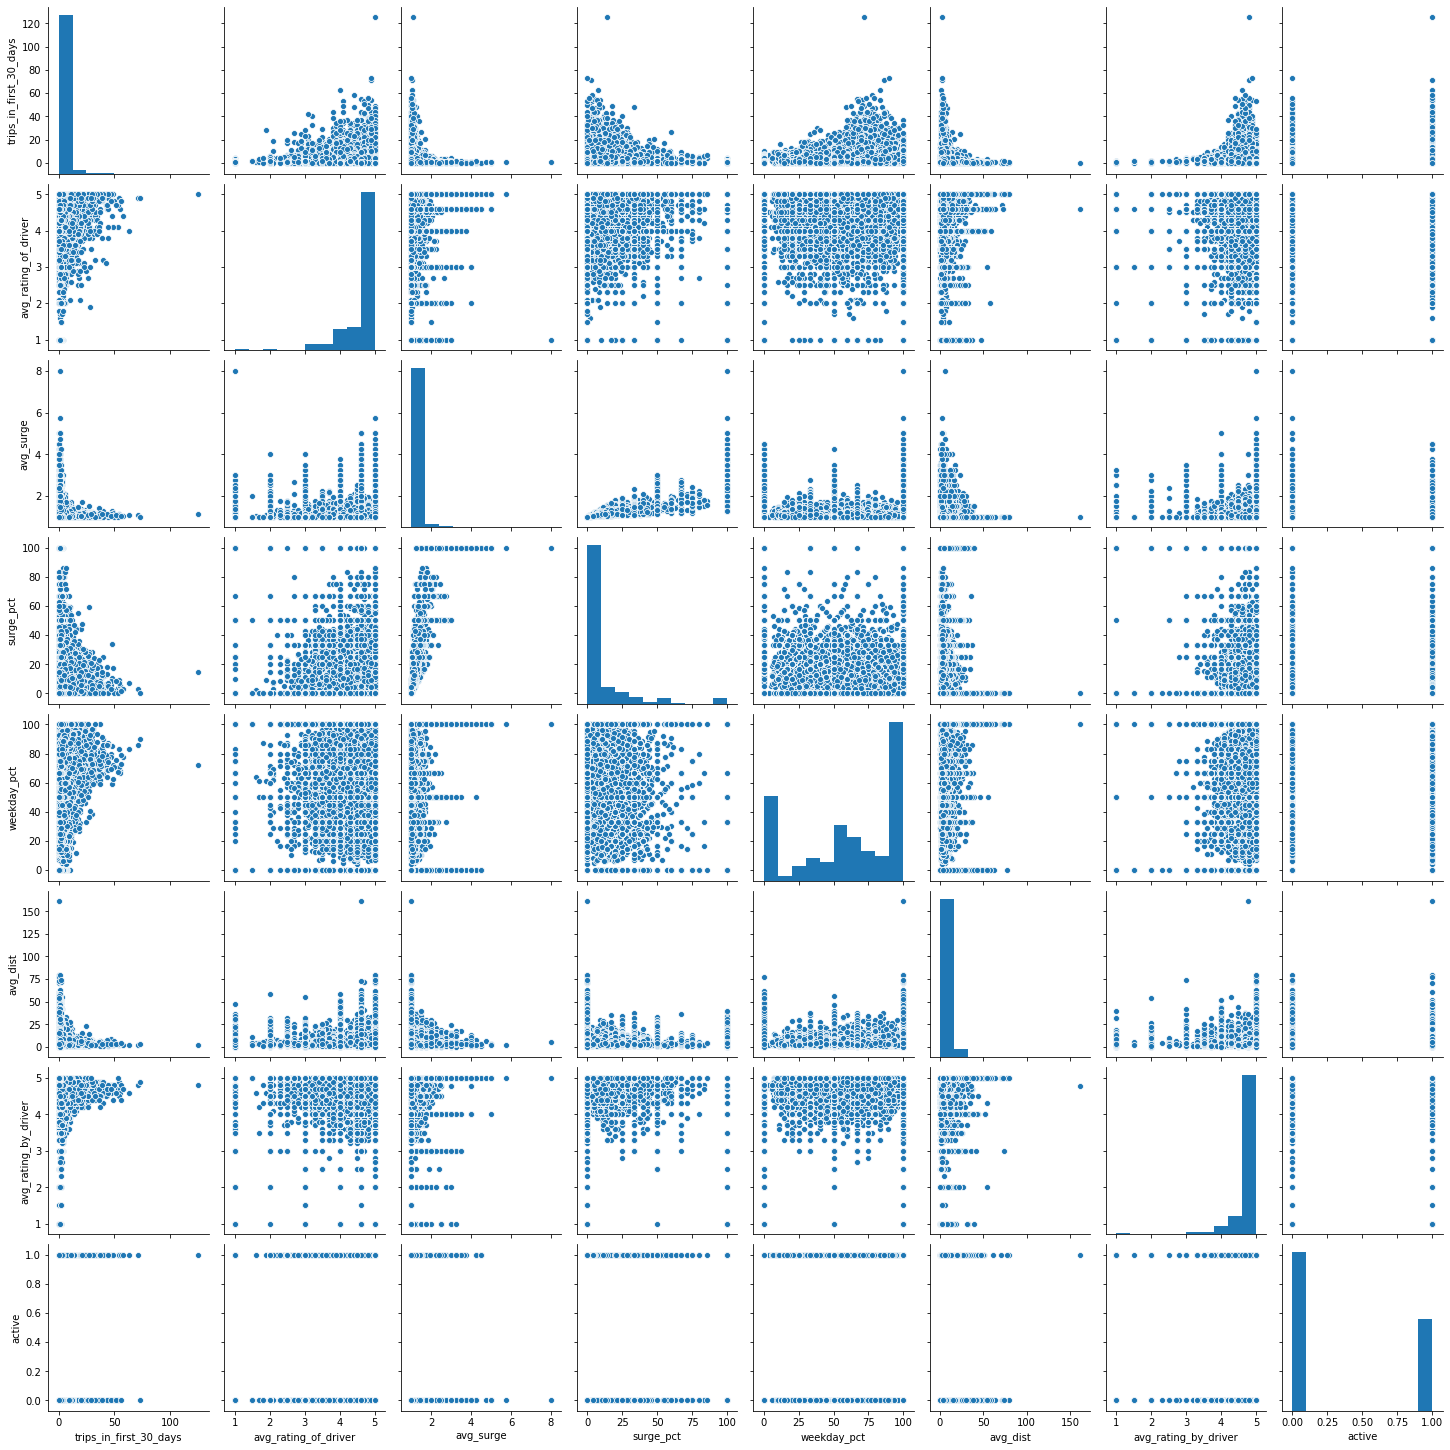

In [23]:
sns.pairplot(data=df_final.select_dtypes(['float64', 'int64']))

In [24]:
# Columns we want to apply outlier correction to:
z_col = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']

In [25]:
df_final.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active'],
      dtype='object')

In [26]:
df_numeric = df_final[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]
df_notnum = df_final[['city', 'phone', 'ultimate_black_user', 'active']]
print(df_final.shape)
print(df_numeric.shape)
print(df_notnum.shape)

(49604, 11)
(49604, 7)
(49604, 4)


In [28]:
from scipy import stats

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3-Q1
print(IQR)

df_numeric_iqr = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric_iqr

trips_in_first_30_days     3.00
avg_rating_of_driver       0.50
avg_surge                  0.05
surge_pct                  8.70
weekday_pct               66.70
avg_dist                   4.51
avg_rating_by_driver       0.30
dtype: float64


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.700000,1.1,15.4,46.2,3.67,5.0
17,0,3.900000,1.0,0.0,95.2,2.38,4.8
23,0,5.000000,1.0,0.0,100.0,7.74,5.0
31,1,4.900000,1.0,0.0,40.0,11.86,5.0
36,2,4.601559,1.0,0.0,50.0,2.43,4.5
...,...,...,...,...,...,...,...
49985,1,4.601559,1.0,0.0,100.0,1.38,5.0
49986,0,4.000000,1.0,0.0,100.0,0.52,5.0
49989,1,4.601559,1.0,0.0,100.0,0.00,5.0
49997,0,5.000000,1.0,0.0,100.0,3.86,5.0


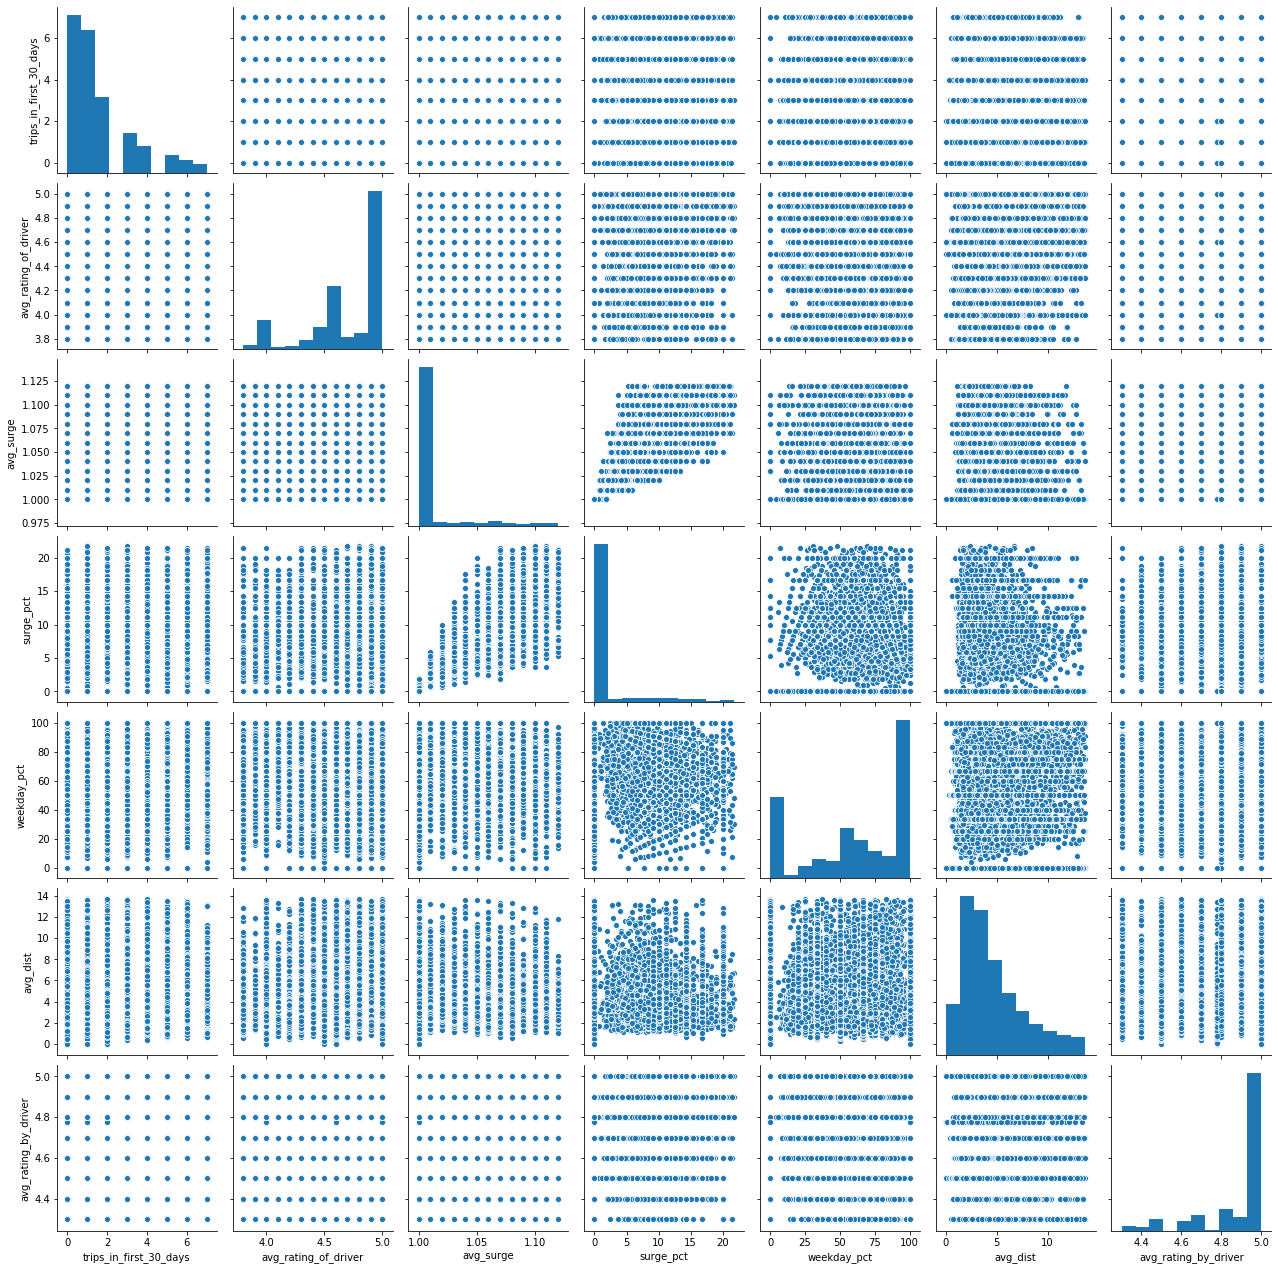

In [29]:
sns.pairplot(data=df_numeric_iqr)

In [30]:
print(df_numeric_iqr.shape)
print(df_notnum.shape)

(29055, 7)
(49604, 4)


In [36]:
df_joined = df_numeric_iqr.join(df_notnum)
df_joined.shape

(29055, 11)

In [37]:
df_joined.head(25)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city,phone,ultimate_black_user,active
0,4,4.700000,1.10,15.4,46.2,3.67,5.0,King's Landing,iPhone,True,1
17,0,3.900000,1.00,0.0,95.2,2.38,4.8,King's Landing,iPhone,True,1
23,0,5.000000,1.00,0.0,100.0,7.74,5.0,King's Landing,Android,True,1
31,1,4.900000,1.00,0.0,40.0,11.86,5.0,Winterfell,iPhone,False,1
36,2,4.601559,1.00,0.0,50.0,2.43,4.5,Astapor,iPhone,False,1
44,2,5.000000,1.00,0.0,66.7,1.40,5.0,King's Landing,iPhone,True,1
49,2,4.400000,1.00,0.0,71.4,10.54,4.7,Winterfell,iPhone,False,1
63,3,4.800000,1.03,5.4,54.1,2.21,4.8,Astapor,iPhone,False,1
67,0,5.000000,1.00,0.0,100.0,1.89,5.0,Winterfell,Android,False,1
68,0,5.000000,1.00,0.0,0.0,4.44,5.0,King's Landing,iPhone,True,1


(array([4.8366e+04, 1.0330e+03, 1.5800e+02, 3.2000e+01, 1.1000e+01,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
        112.5, 125. ]),
 <a list of 10 Patch objects>)

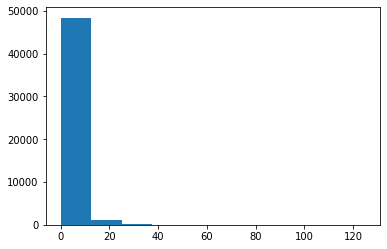

In [45]:
plt.hist(df_final.trips_in_first_30_days)

(array([9489., 8560., 4559.,    0., 2402., 1642.,    0., 1065.,  777.,
         561.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

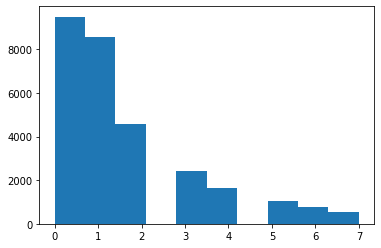

In [46]:
plt.hist(df_joined.trips_in_first_30_days)

### PRE-PROCESSING

In [55]:
# One Hot Encoding
df_onehot = pd.get_dummies(df_final, columns=['city', 'phone', 'ultimate_black_user'])
df_onehot.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
5,2,3.5,1.00,0.0,100.0,10.56,5.0,1,0,0,1,0,1,0,1
13,0,4.0,1.38,50.0,50.0,3.04,5.0,1,0,1,0,0,1,1,0
16,1,5.0,1.00,0.0,50.0,10.86,3.0,1,0,1,0,1,0,0,1


In [59]:
# Splitting our y variable from the dataframe and making our train/test split.
y = df_onehot.active
X = df_onehot.drop(['active', 'phone_Android', 'ultimate_black_user_False'], axis=1)

print(y.head())
print(X.head())

0     1
3     1
5     1
13    1
16    1
Name: active, dtype: int64
    trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                        4                   4.7       1.10       15.4   
3                        9                   4.6       1.14       20.0   
5                        2                   3.5       1.00        0.0   
13                       0                   4.0       1.38       50.0   
16                       1                   5.0       1.00        0.0   

    weekday_pct  avg_dist  avg_rating_by_driver  city_Astapor  \
0          46.2      3.67                   5.0             0   
3          80.0      2.36                   4.9             0   
5         100.0     10.56                   5.0             0   
13         50.0      3.04                   5.0             0   
16         50.0     10.86                   3.0             0   

    city_King's Landing  city_Winterfell  phone_iPhone  \
0                     1                

In [61]:
# Train, Test, Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37203, 12)
(37203,)
(12401, 12)
(12401,)


### MODELING

##### RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

rf = RandomForestClassifier(criterion='entropy', random_state=37, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Model - Max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest Model - Max depth 5
Accuracy: 0.7716313200548343
Balanced accuracy: 0.7281517046019144
Precision score 0.7512423268050278
Recall score 0.891592356687898


In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 6 (0.178740)
2. feature 3 (0.175746)
3. feature 8 (0.162130)
4. feature 2 (0.120700)
5. feature 10 (0.104572)
6. feature 4 (0.096548)
7. feature 11 (0.071278)
8. feature 0 (0.037261)
9. feature 7 (0.030133)
10. feature 9 (0.010750)
11. feature 5 (0.006321)
12. feature 1 (0.005821)


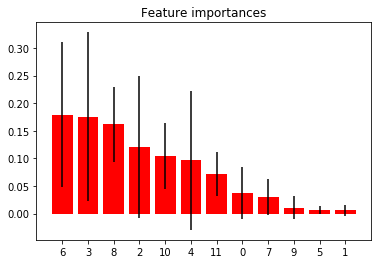

In [81]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for rf in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [92]:
print('Feature Ranking:')
print('1. ' + X_train.columns[6])
print('2. ' + X_train.columns[3])
print('3. ' + X_train.columns[8])
print('4. ' + X_train.columns[2])

Feature Ranking:
1. avg_rating_by_driver
2. surge_pct
3. city_King's Landing
4. avg_surge


##### DECISION TREE

In [84]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(random_state=37, max_depth=5)
decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)

print("Decision Tree (Entropy) - Max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Decision Tree (Entropy) - Max depth 5
Accuracy: 0.7579227481654706
Balanced accuracy: 0.7135837717475126
Precision score 0.7258675998833479
Recall score 0.8802547770700637


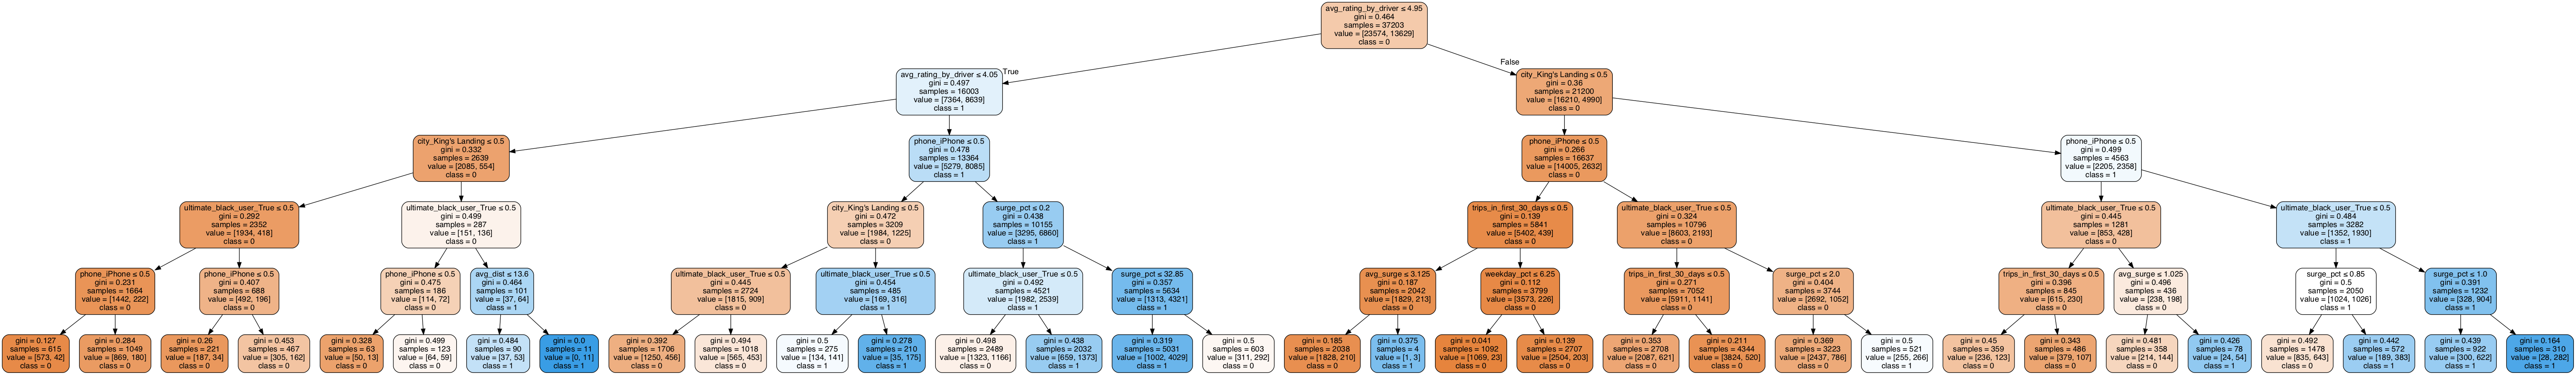

In [83]:
# Visualize the tree.
dot_data = StringIO()
export_graphviz(decision, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())